<a href="https://colab.research.google.com/github/EmmanuelLwele/Parametric-Representation-of-3D-Propeller-Blade-Geometry/blob/main/Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESGI 2025 AALBORG

## PROBLEM 2 Parametric Representation of 3D Propeller Blade Geometry

### QUESTION #1

#### Description of the camber as a reversible transformation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from tqdm import tqdm

##### Going forwards

In [ ]:
#blade parameters

mm = 0.29             # max blade half-width
pp = 0.3              # x-coordinate of point in the mean curve giving the max blade half-width
rr = 0.1              # leading edge radius
tt = np.sqrt(rr)/1.1

In [ ]:
# y-coordinate of points in the mean curve as a function of the x-coordinate

def yycc(x,m,p):

    out = m *(2*p*x -x**2)/p**2
    if (x > p):
        out = m*(1 -2*p +2*p*x-x**2)/(1-p)**2
    return out

In [ ]:
npts = 1000
xx = np.linspace(0,1,npts)
YC = np.array([yycc(u,mm,pp) for u in xx])

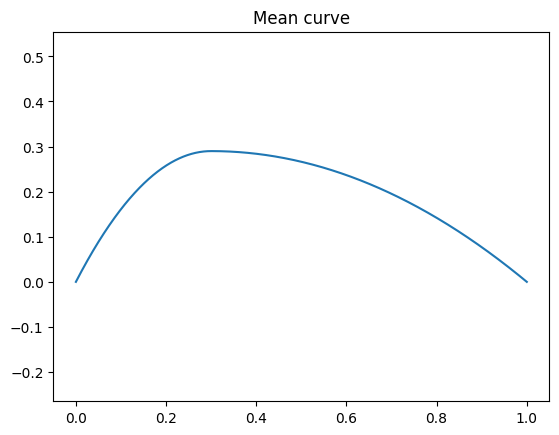

In [ ]:
plt.axis('equal')
plt.title('Mean curve')
plt.plot(xx,YC)

In [ ]:
# derivative of the funtion giving the y-coord

def dyycc(x,m,p):
    # Use np.where for vectorized conditional logic
    out = np.where(x <= p, m * (2*p - 2*x) / p**2, m * (2*p - 2*x) / (1-p)**2)
    return out

In [ ]:
# half-width as a function of the x-coord of the corresponding point in the mean curve

def width(x,t):
  out = t *(0.2969*np.sqrt(x)-0.1260 *x -0.3516 * x**2 + 0.2843 * x**3 -0.10150 * x**4)/0.20
  return out

In [ ]:
half_width = np.array([width(u,tt) for u in xx])

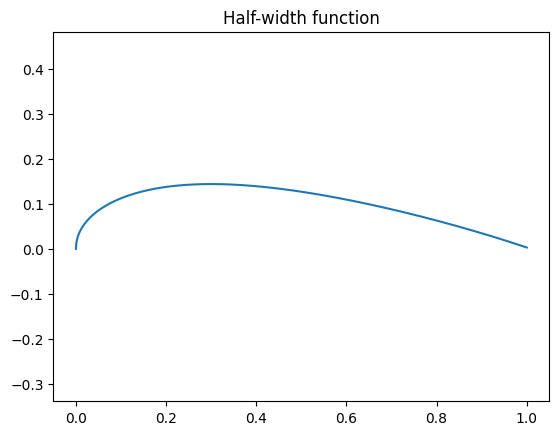

In [ ]:
plt.axis('equal')
plt.title('Half-width function')
plt.plot(xx,half_width)

In [ ]:
# angle between tangent to mean curve and horizontal axis

def varphi(x,m,p):
  out = np.arctan2(dyycc(x,m,p),1)
  return out

In [ ]:
angles = np.array([varphi(u,mm,pp) for u in xx])

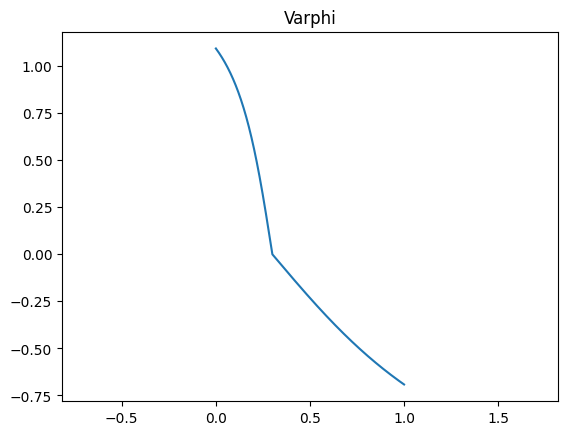

In [ ]:
plt.axis('equal')
plt.title('Varphi')
plt.plot(xx,angles)

In [ ]:
# points in the upper curve

def xxuu(x,m,p,t):
  out = x - width(x,t) * np.sin(varphi(x,m,p))
  return out

def yyuu(x,m,p,t):
  out = yycc(x,m,p) + width(x,t) * np.cos(varphi(x,m,p))
  return out

# points in the lower curve

def xxll(x,m,p,t):
  out = x + width(x,t) * np.sin(varphi(x,m,p))
  return out

def yyll(x,m,p,t):
  out = yycc(x,m,p) - width(x,t) * np.cos(varphi(x,m,p))
  return out


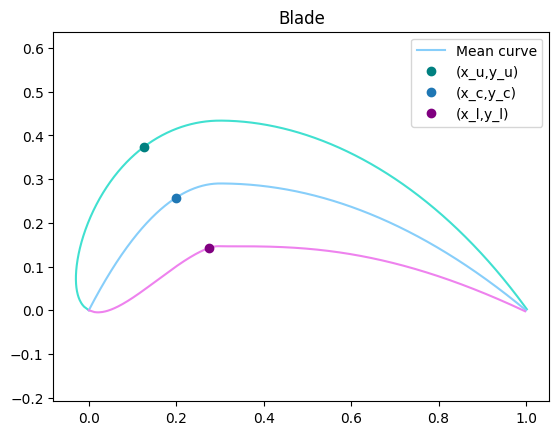

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

marker_x = 0.2

plt.axis('equal')
plt.title('Blade')
plt.plot(XU,YU, color='turquoise')
plt.plot(xx,YC, color='lightskyblue',label='Mean curve')
plt.plot(XL,YL, color='violet')
plt.plot(xxuu(marker_x,mm,pp,tt), yyuu(marker_x,mm,pp,tt), 'o', color='teal', label='(x_u,y_u)')  # plot in upper curve
plt.plot(marker_x, yycc(marker_x,mm,pp), 'o', label='(x_c,y_c)')  # plot in mean curve
plt.plot(xxll(marker_x,mm,pp,tt), yyll(marker_x,mm,pp,tt), 'o', color='purple', label='(x_l,y_l)')  # plot in lower curve
plt.legend()
plt.show()

##### Going backwards

In [ ]:
from scipy.optimize import root_scalar

In [ ]:
# the function to compute alpha and beta for given x-coordinate

def find_alpha_and_beta(x, m, p, t, x0_guess=0.5, tol=1e-6):
    """
    Find: alpha such that xxuu(alpha, m, p, t) = x
    and beta such that xxll(beta, m, p, t) = x.
    """
    targets = [x]
    solutionsu = []
    solutionsl = []

    for value in targets:
        # functions whose root we want:
        # f(x) = xxuu(x) - value = 0
        fu = lambda x: xxuu(x, m, p, t) - value
        # g(x) = xxcc(x) - value = 0
        fl = lambda x: xxll(x, m, p, t) - value

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fu, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsu.append(sol.root)
            else:
                solutionsu.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsu.append(np.nan)

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fl, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsl.append(sol.root)
            else:
                solutionsl.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsl.append(np.nan)

    return np.array(solutionsu), np.array(solutionsl), targets


In [ ]:
common_x = 0.2

alpha, beta, y_c = find_alpha_and_beta(common_x,mm, pp, tt)

print(alpha)
print(beta)
print(y_c)

[0.24639797]
[0.11012363]
[0.2]


In [ ]:
# check outputs

print(xxuu(alpha,mm,pp,tt))
print(yyuu(alpha,mm,pp,tt))
print(xxll(beta,mm,pp,tt))
print(yyll(beta,mm,pp,tt))

[0.19999993]
[0.4150596]
[0.20000009]
[0.10037949]


ValueError: 'medium orchid' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

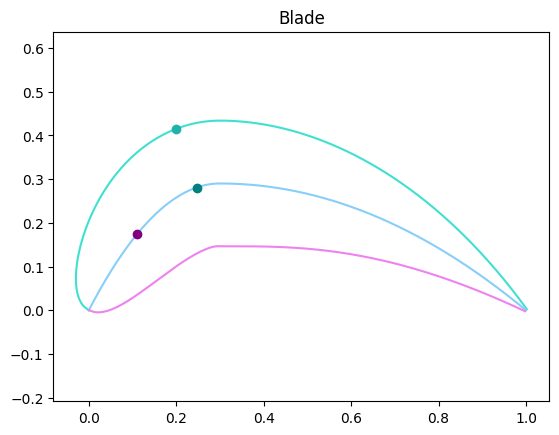

In [ ]:
XU = np.array([xxuu(u,mm,pp,tt) for u in xx])
YU = np.array([yyuu(u,mm,pp,tt) for u in xx])
XL = np.array([xxll(u,mm,pp,tt) for u in xx])
YL = np.array([yyll(u,mm,pp,tt) for u in xx])

common_x = 0.2
alpha, beta, y_c = find_alpha_and_beta(common_x,mm, pp, tt)
alpha_for_x = alpha[0]
beta_for_x = beta[0]

plt.axis('equal')
plt.title('Blade')
plt.plot(XU,YU, color='turquoise')
plt.plot(xx,YC, color='lightskyblue',label='Mean curve')
plt.plot(XL,YL, color='violet')
plt.plot(common_x, yyuu(alpha_for_x,mm,pp,tt), 'o', color='teal', label='(x_u,y_u)')  # point in upper curve
plt.plot(alpha_for_x, yycc(alpha_for_x,mm,pp), 'o', label='(x_c,y_c)')  # alpha-point in mean curve
plt.plot(beta_for_x, yycc(beta_for_x,mm,pp), 'o', label='(x_c,y_c)')  # beta-point in mean curve
plt.plot(common_x, yyll(beta_for_x,mm,pp, tt), 'o', color='purple', label='(x_l,y_l)')  # point in lower curve
plt.legend()
plt.show()

In [ ]:
# the function to compute alpha and beta for targets

def find_x_for_targets(m, p, t, x0_guess=0.5, tol=1e-6):
    """
    Find x_i such that xxuu(x_i, m, p, t) = target_i
    for target_i in {0.1, 0.2, ..., 0.9}.
    """
    targets = np.arange(0.1, 1.0, 0.1)
    solutionsu = []
    solutionsl = []

    for y in targets:
        # function whose root we want: f(x) = xxuu(x) - y = 0
        fu = lambda x: xxuu(x, m, p, t) - y
        fl = lambda x: xxll(x, m, p, t) - y

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fu, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsu.append(sol.root)
            else:
                solutionsu.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsu.append(np.nan)

        # initial guess for the root
        x0 = x0_guess

        # we try to bracket the root around [0,1]
        try:
            sol = root_scalar(fl, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            if sol.converged:
                solutionsl.append(sol.root)
            else:
                solutionsl.append(np.nan)
        except ValueError:
            # if no sign change in [0,1]
            solutionsl.append(np.nan)

    return np.array(solutionsu), np.array(solutionsl), targets


In [ ]:
xcima, xbaixo , yl = find_x_for_targets(mm, pp, tt)
print("yyuu:",np.array([yyuu(u,mm,pp,tt) for u in xcima]))
print("yyll:",np.array([yyll(u,mm,pp,tt) for u in xbaixo]))

yyuu: [0.35187453 0.4150596  0.43378126 0.42513262 0.40008609 0.35893759
 0.30101336 0.22477787 0.12760411]
yyll: [0.02825785 0.10037949 0.14621874 0.14576133 0.14074168 0.12813547
 0.10706233 0.07768933 0.04064549]


In [ ]:
# ---------------------------------------------------------------------
# the function to compute alpha and beta for targets
# ---------------------------------------------------------------------

def find_x_for_targets(m, p, t, tol=1e-6):
    """
    Find x_i such that xxuu(x_i, m, p, t) = target_i
    and xxll(x_i, m, p, t) = target_i
    for target_i in {0.1, 0.2, ..., 0.9}.
    """
    targets = np.arange(0.1, 1.0, 0.1)
    solutionsu, solutionsl = [], []

    for y in targets:
        fu = lambda x: xxuu(x, m, p, t) - y
        fl = lambda x: xxll(x, m, p, t) - y

        try:
            sol = root_scalar(fu, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            solutionsu.append(sol.root if sol.converged else np.nan)
        except ValueError:
            solutionsu.append(np.nan)

        try:
            sol = root_scalar(fl, bracket=(0.0, 1.0), method="bisect", xtol=tol)
            solutionsl.append(sol.root if sol.converged else np.nan)
        except ValueError:
            solutionsl.append(np.nan)

        fyu = lambda x: yyuu(x, m, p, t)
        fyl = lambda x: yyll(x, m, p, t)

        output_u = np.array([fyu(u) for u in solutionsu])
        output_l = np.array([fyl(u) for u in solutionsl])


    return output_u, output_l, targets

# ---------------------------------------------------------------------
# Mesh generation
# ---------------------------------------------------------------------
def closed_grid(start: float, stop: float, step: float) -> np.ndarray:
    n = int(round((stop - start) / step)) + 1
    return np.round(np.linspace(start, stop, n, endpoint=True), 6)

def build_mesh() -> np.ndarray:
    radius = closed_grid(0.01, 0.20, 0.01)   # 20
    mthick = closed_grid(0.10, 0.40, 0.01)   # 31
    pp     = closed_grid(0.20, 0.50, 0.01)   # 31
    MM, PP, TT = np.meshgrid(mthick, pp, radius, indexing="ij")
    X = np.stack([MM.ravel(), PP.ravel(), TT.ravel()], axis=1)  # (19220, 3)
    return X

# ---------------------------------------------------------------------
# Run for all mesh points
# ---------------------------------------------------------------------
def run_over_mesh():
    mesh = build_mesh()
    n_points = mesh.shape[0]
    n_targets = 9

    # results arrays
    upper = np.full((n_points, n_targets), np.nan)
    lower = np.full((n_points, n_targets), np.nan)

    for i, (m, p, t) in enumerate(tqdm(mesh, desc="Solving")):
        su, sl, _ = find_x_for_targets(m, p, t)
        upper[i, :] = su
        lower[i, :] = sl

    return mesh, upper, lower

In [ ]:
mesh, xu, xl = run_over_mesh()
print("mesh shape:", mesh.shape)
print("upper solutions shape:", xu.shape)
print("lower solutions shape:", xl.shape)
print("sample row:")
print("m, p, t =", mesh[0])
print("x_upper =", xu[0])
print("x_lower =", xl[0])

Solving: 100%|██████████| 19220/19220 [02:23<00:00, 134.08it/s]

mesh shape: (19220, 3)
upper solutions shape: (19220, 9)
lower solutions shape: (19220, 9)
sample row:
m, p, t = [0.1  0.2  0.01]
x_upper = [0.07938219 0.10478128 0.10344138 0.09859617 0.09037064 0.07883564
 0.0640316  0.04597796 0.02467531]
x_lower = [0.07065693 0.09521872 0.09343361 0.08890565 0.08150855 0.07117075
 0.05785107 0.04152969 0.02220511]
